In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [2]:
folder_info = {}
with open('file_name_dict_doublemix.txt') as f:
    lines = f.readlines()
    for line in lines:
        line = line.strip()
        if line.find('##')>=0:
            folder_info[line[line.find('##')+3:]] = []
            last_model = line[line.find('##')+3:]
        elif len(line)>0:
            folder_info[last_model].append(line)
#folder_info            

In [3]:
del_list = []
for model in folder_info.keys():
    if model.find('mlp')>=0 or model.find('nOut1024')>=0:
        del_list.append(model)
for model in del_list:
    del folder_info[model]

In [4]:
supervised_list = []
AHC_list = []
for model in folder_info.keys():
    if model.find('Supervised')>=0 or model.find('supervised,')>=0:
        supervised_list.append(model)
    else:
        AHC_list.append(model)
supervised_folder_info = {x: folder_info[x] for x in folder_info if x in supervised_list}
AHC_folder_info = {x: folder_info[x] for x in folder_info if x in AHC_list}

In [5]:
def rename_legend(name):
    if name.find('imix')>=0 and name.find('_0p5')>=0:
        return 'imix (α=0.5)'
    elif name.find('imix')>=0:
        return 'imix (α=1)'
    elif (name.find('vmix')>=0 or name.find('lmix')>=0) and name.find('_0p5')>=0:
        return 'lmix (α=0.5)'
    elif name.find('vmix')>=0 or name.find('lmix')>=0:
        return 'lmix (α=1)' 
    
def rename_AHC_model(name):
    model = 'AHC (12-Norm)'
    if name == 'AHC results (stdscaler)':
        return 'AHC (mean-std scaling)'
    if name == 'AHC (12-Norm)':
        return name
    if name.find('multitask')>=0:
        model += ' + MHA'
    if name.find('doublemix')>=0 or name.find('_double_')>=0 or name.find('doubleimix')>=0:
        model += ' + double imix'
    if name.find('latent')>=0:
        model += ' + double lmix'
    if name.find('frames')>=0:
        model += ' + frames mixup'
    if name.find('moex')>=0:
        model += ' + MoEx mixup'
    if name.find('unsupervisedMixup')>=0:
        model += ' + VMT mixup'
    if name.find('cosdist')>=0:
        if name.find('coef 8')>=0:
            model += ' [Coef. 8, Cosine distance]'
        if name.find('coef0p5')>=0 or name.find('coef 0.5')>=0:
            model += ' [Coef. 0.5, Cosine distance]'
        if name.find('coef0p33')>=0:
            model += ' [Coef. 0.33, Cosine distance]'  
    else:
        if name.find('coef 8')>=0:
            model += ' [Coef. 8]'
        if name.find('coef0p5')>=0 or name.find('coef 0.5')>=0:
            model += ' [Coef. 0.5]'
        if name.find('coef0p33')>=0:
            model += ' [Coef. 0.33]'
    return model

####AHC (mean-std scaling)####


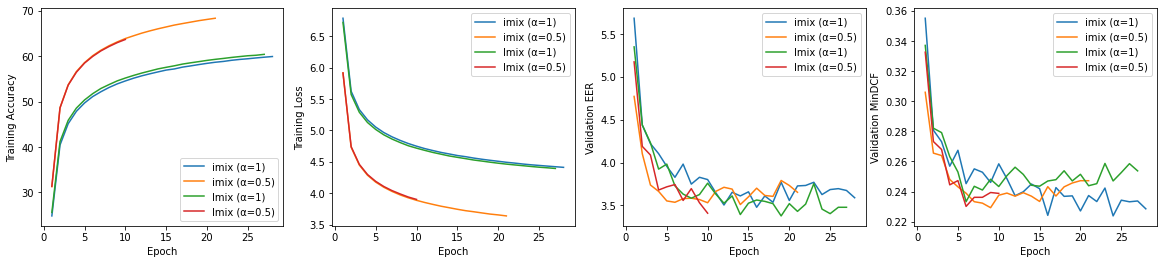

####AHC (12-Norm)####


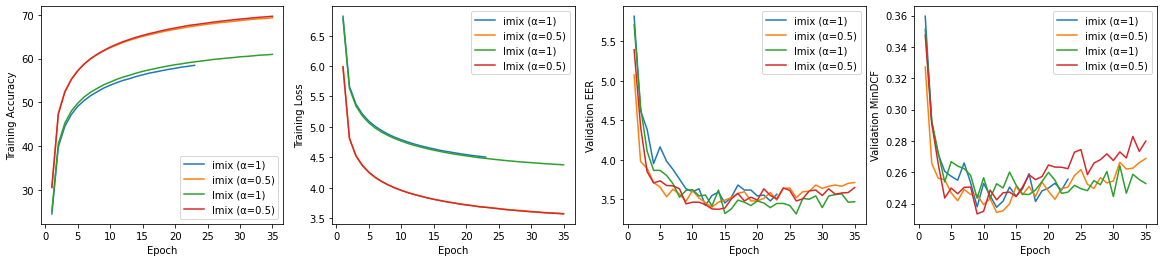

####AHC (12-Norm) + double imix [Coef. 8]####


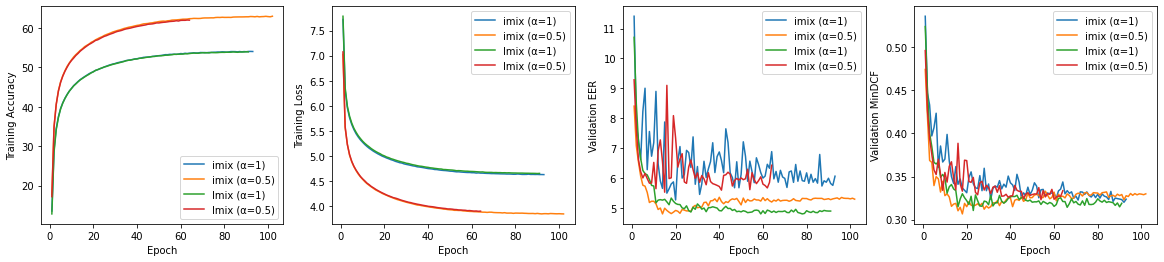

####AHC (12-Norm) + MHA + double imix [Coef. 8]####


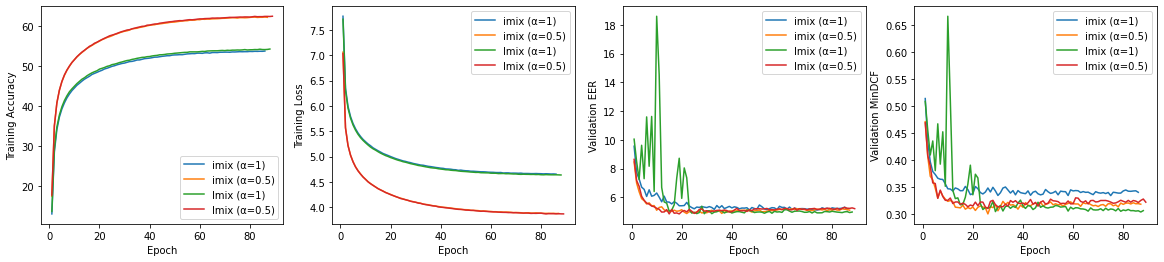

####AHC (12-Norm) + double imix [Coef. 0.5]####


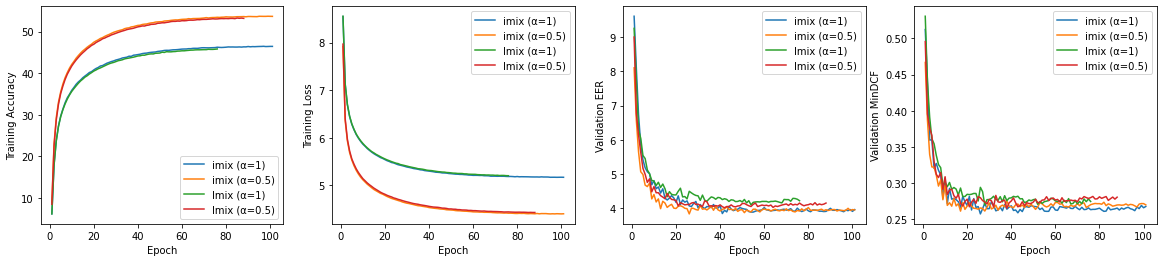

####AHC (12-Norm) + MHA + double imix [Coef. 0.5]####


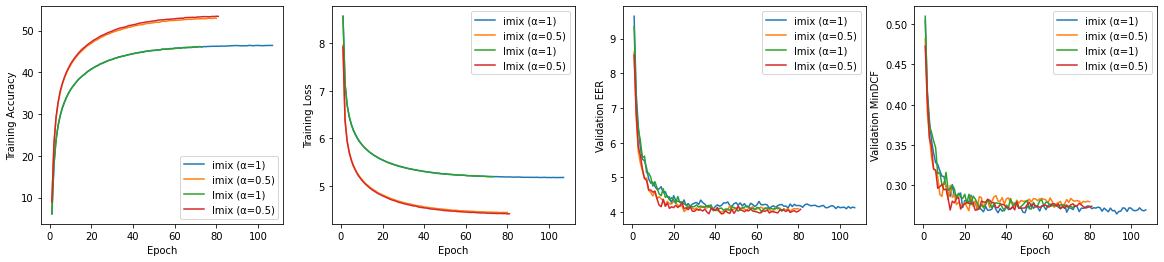

####AHC (12-Norm) + frames mixup####


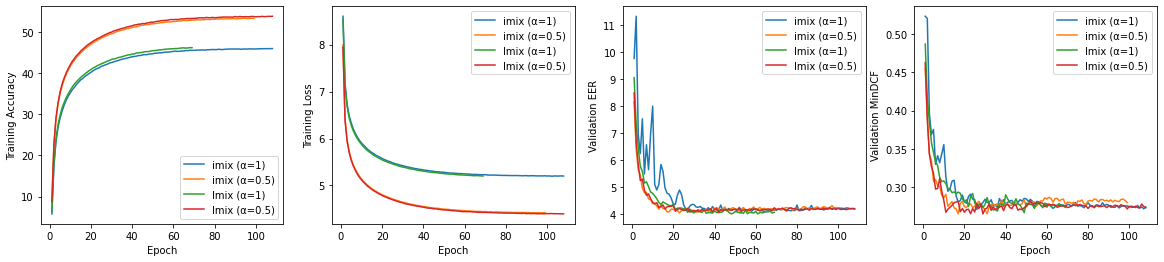

####AHC (12-Norm) + MHA + frames mixup####


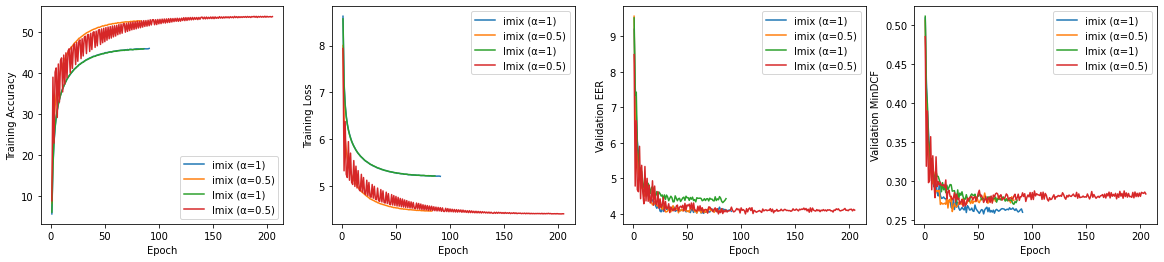

####AHC (12-Norm) + MoEx mixup####


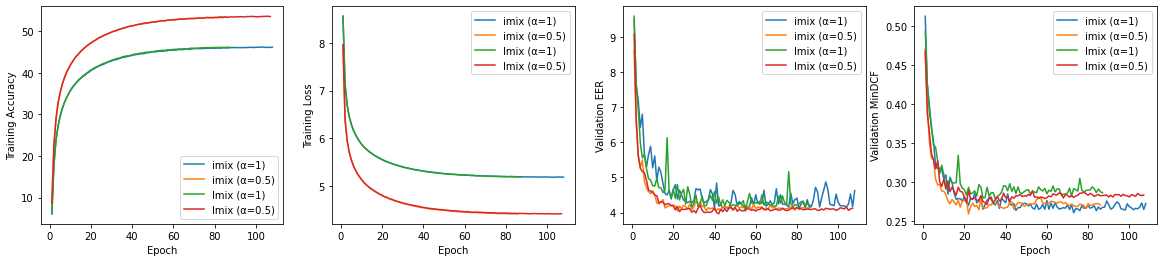

####AHC (12-Norm) + MHA + MoEx mixup####


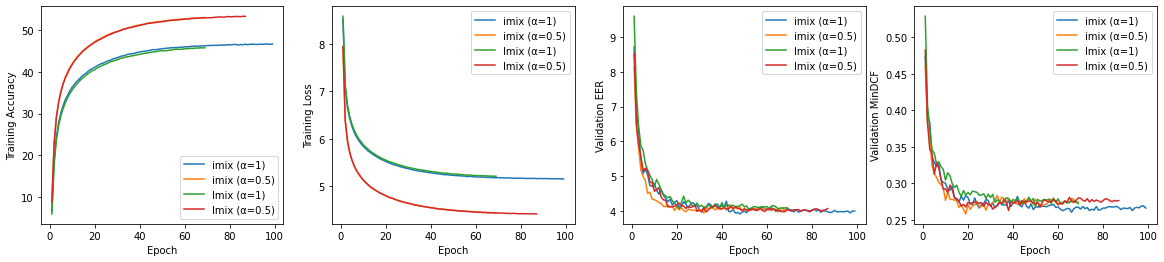

####AHC (12-Norm) + double lmix####


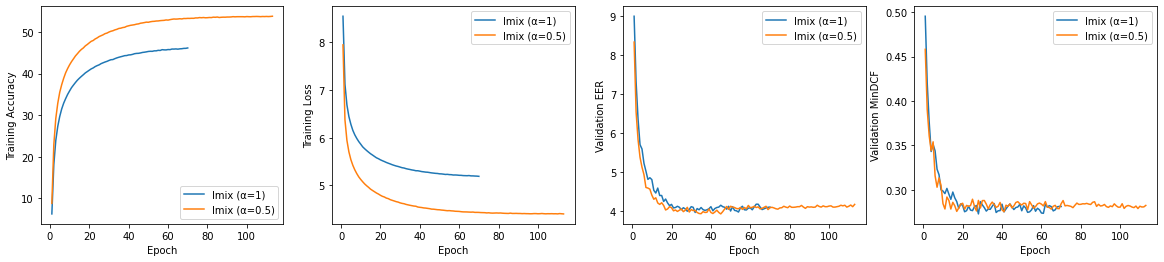

####AHC (12-Norm) + MHA + double lmix####


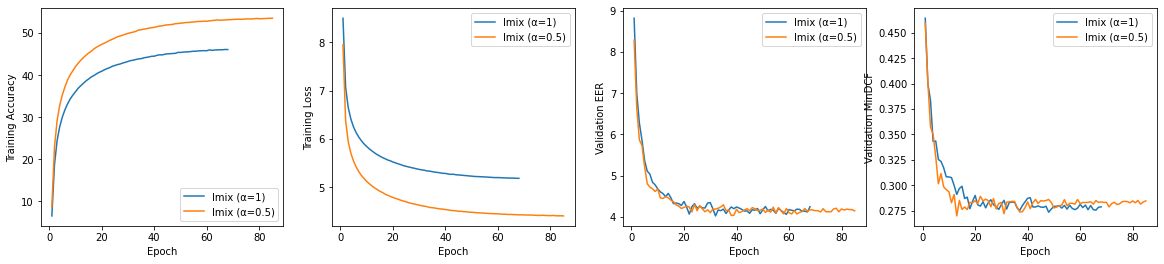

####AHC (12-Norm) + double imix + frames mixup + MoEx mixup####


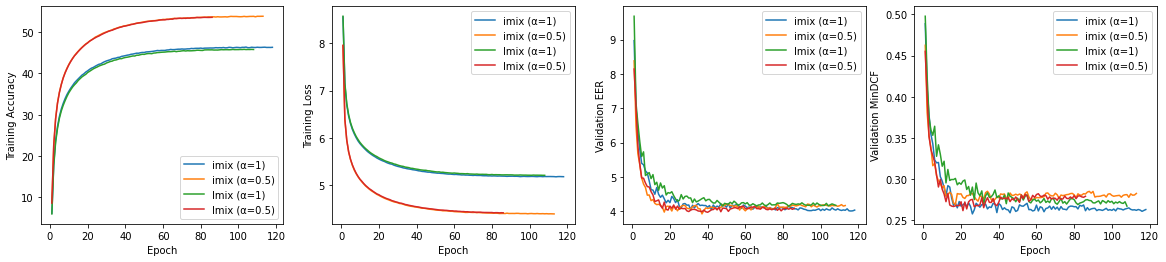

####AHC (12-Norm) + MHA + double imix + frames mixup + MoEx mixup####


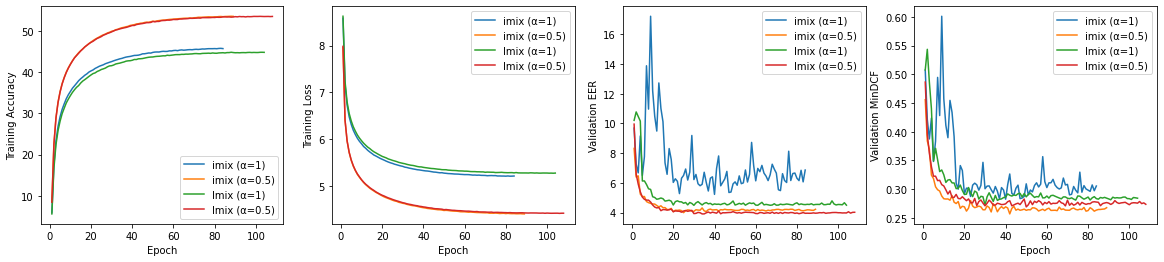

####AHC (12-Norm) + double imix + double lmix + frames mixup + MoEx mixup####


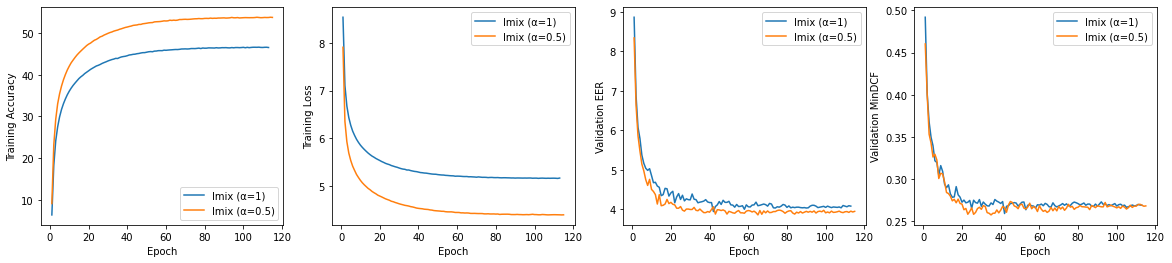

####AHC (12-Norm) + MHA + double imix + double lmix + frames mixup + MoEx mixup####


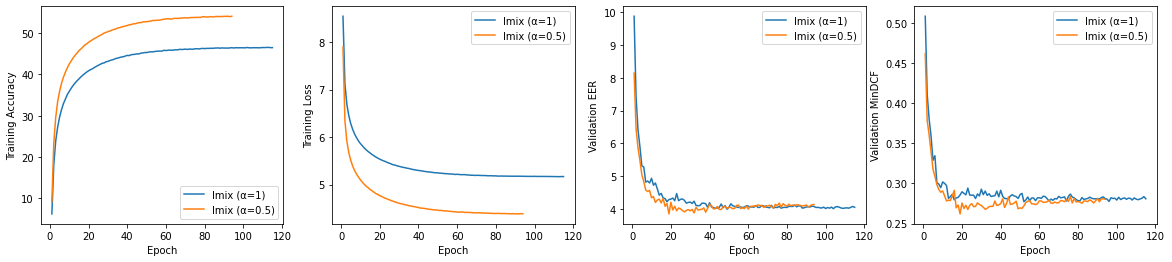

####AHC (12-Norm) + double imix + double lmix + frames mixup + MoEx mixup [Coef. 0.33]####


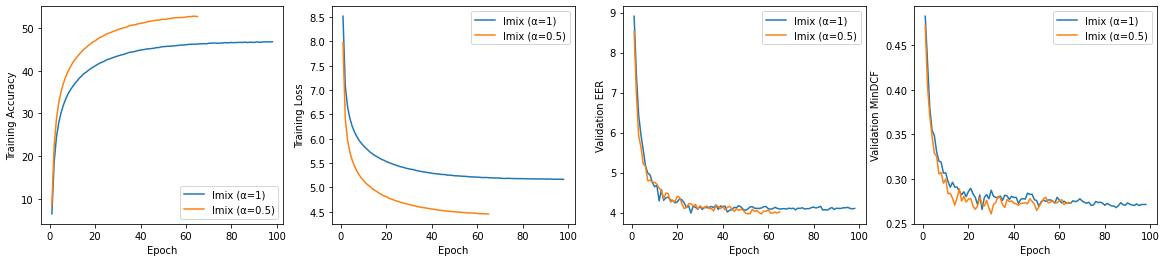

####AHC (12-Norm) + MHA + double imix + double lmix + frames mixup + MoEx mixup [Coef. 0.33]####


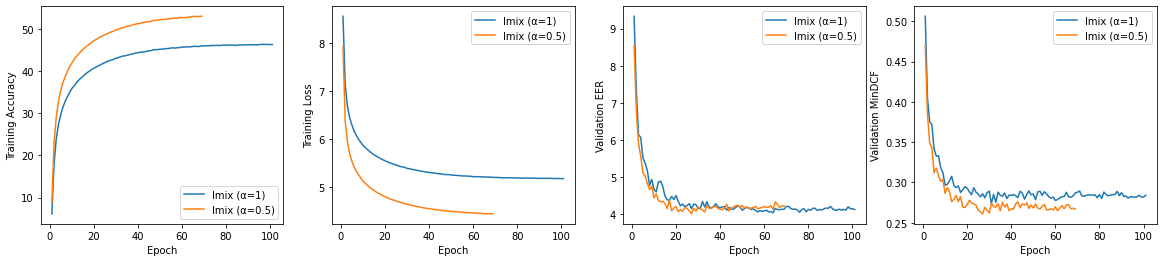

####AHC (12-Norm) + double imix + frames mixup + MoEx mixup [Coef. 0.33]####


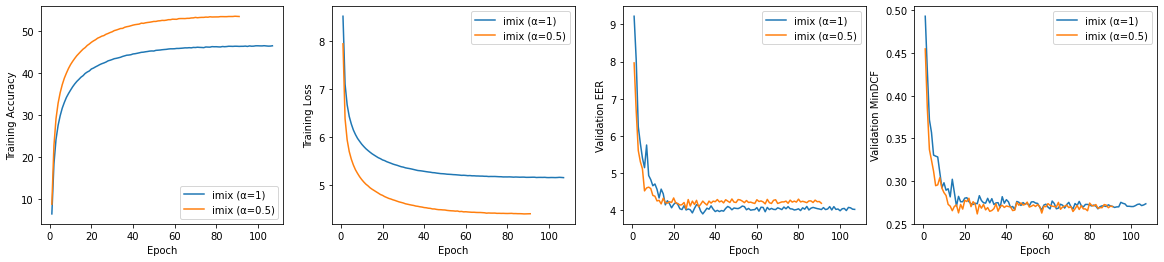

####AHC (12-Norm) + MHA + double imix + frames mixup + MoEx mixup [Coef. 0.33]####


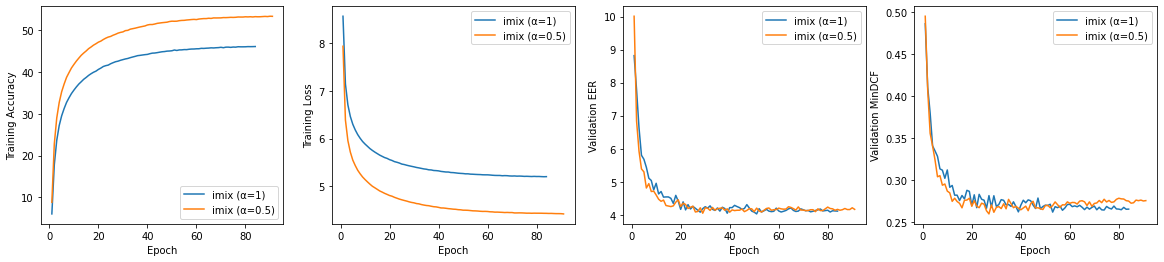

####AHC (12-Norm) + double lmix [Coef. 0.5, Cosine distance]####


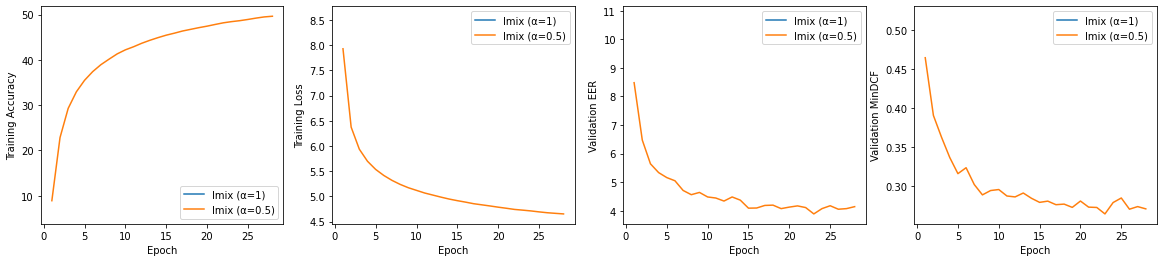

####AHC (12-Norm) + MHA + double lmix [Coef. 0.5, Cosine distance]####


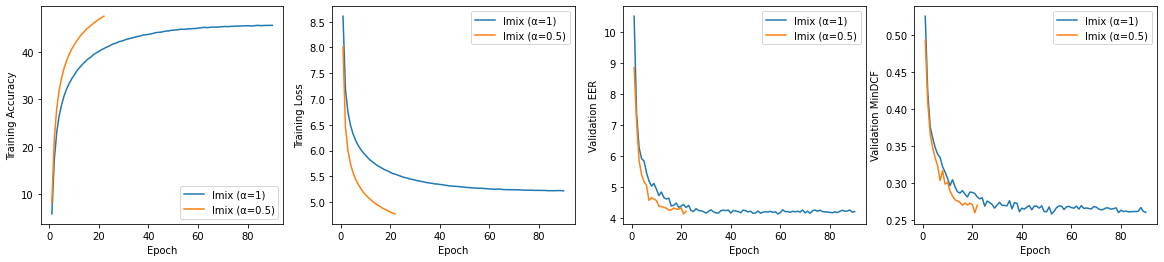

####AHC (12-Norm) + double imix [Coef. 0.5, Cosine distance]####


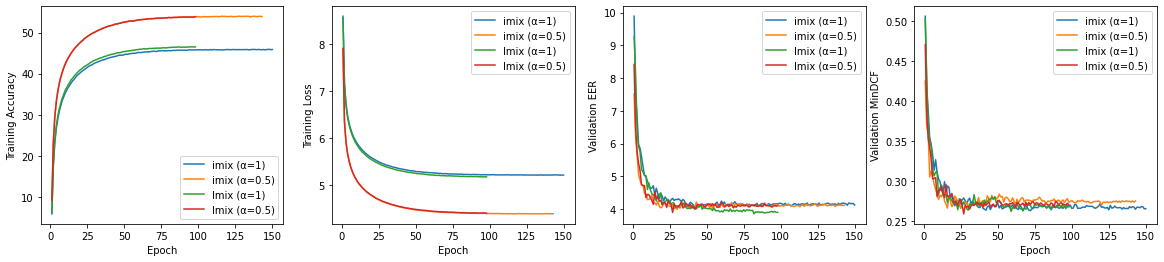

####AHC (12-Norm) + MHA + double imix [Coef. 0.5, Cosine distance]####


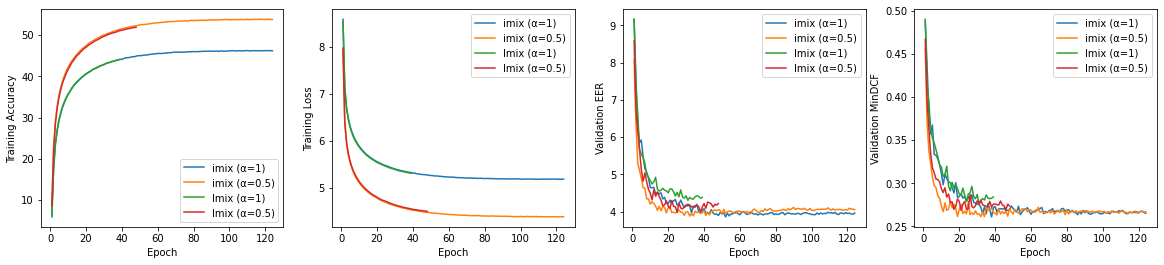

####AHC (12-Norm) + double lmix + VMT mixup [Coef. 0.5, Cosine distance]####


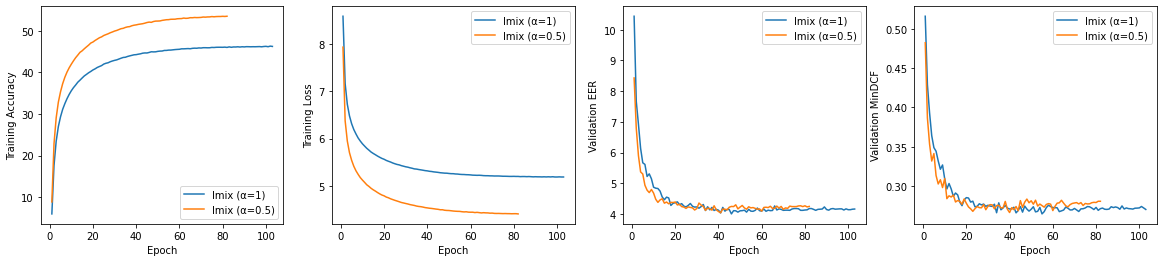

####AHC (12-Norm) + double lmix + VMT mixup [Coef. 0.5]####


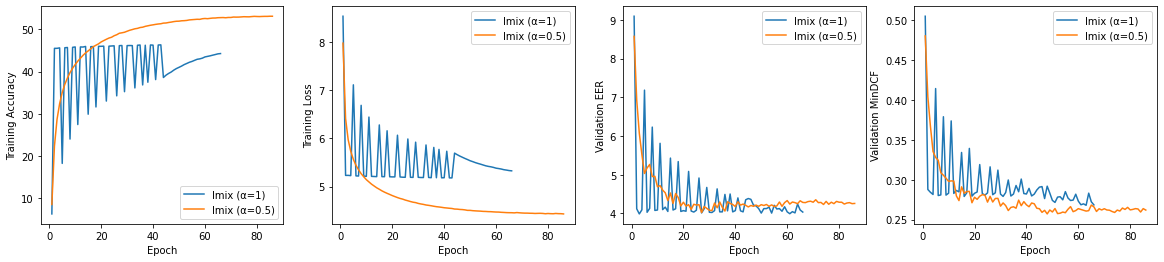

####AHC (12-Norm) + double imix + VMT mixup [Coef. 0.5, Cosine distance]####


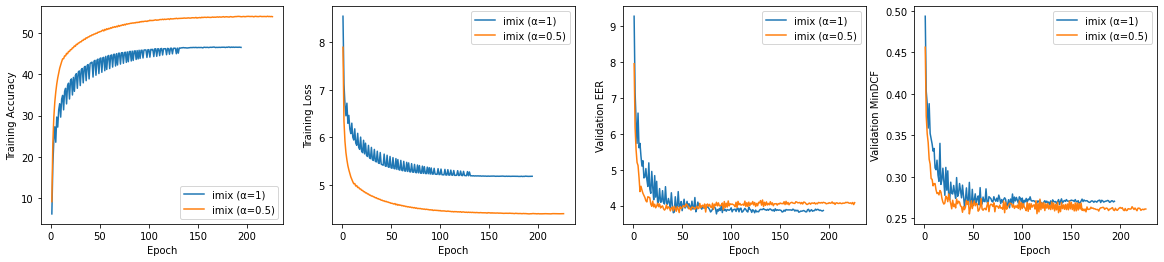

####AHC (12-Norm) + double imix + VMT mixup [Coef. 0.5]####


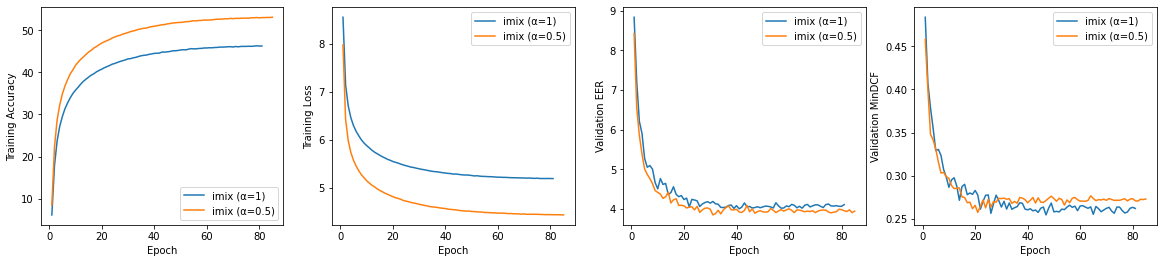

####AHC (12-Norm) + VMT mixup [Coef. 0.5, Cosine distance]####


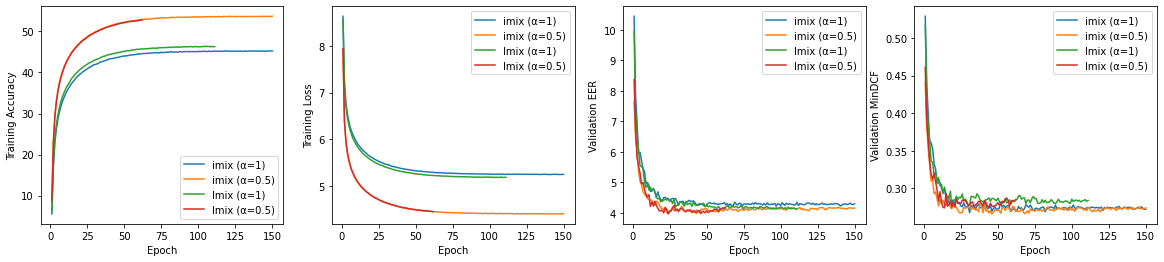

####AHC (12-Norm) + VMT mixup [Coef. 0.5]####


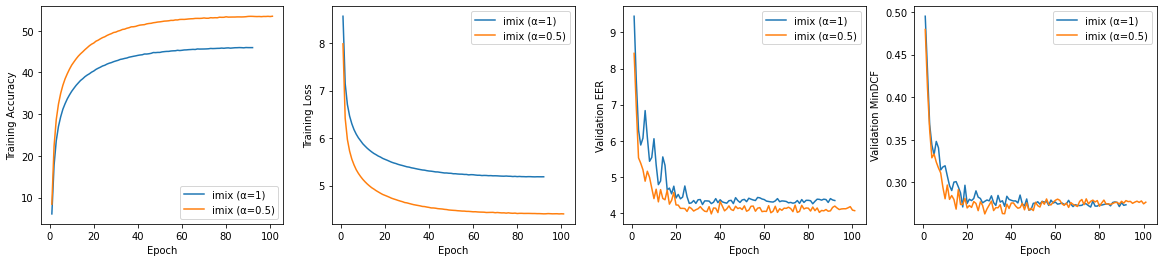

In [6]:
models = list(AHC_folder_info.keys())
for model in models:
    print('####'+rename_AHC_model(model)+'####')
    loss_acc = {}
    for file in AHC_folder_info[model]:
        loss_acc[file] = {}
        loss_acc[file]['Training Accuracy'] = []
        loss_acc[file]['Training Loss'] = []
        loss_acc[file]['Validation EER'] = []
        loss_acc[file]['Validation MinDCF'] = []
        with open('folder_MTL/'+file+'/result/scores.txt') as f:
            lines = f.readlines()
            for line in lines:
                line = line.strip()
                if line.find('TEER/TAcc')>=0:
                    if line.find('Epoch 1,')>=0:
                        loss_acc[file]['Training Accuracy'] = []
                        loss_acc[file]['Training Loss'] = []
                    loss_acc[file]['Training Accuracy'].append(float(line[line.find('TAcc')+5:line.find(', TLOSS')]))
                    loss_acc[file]['Training Loss'].append(float(line[line.find('TLOSS')+6:line.find(', LR')]))
                
                elif line.find('VEER')>=0:
                    if line.find('Epoch 1,')>=0:
                        loss_acc[file]['Validation EER'] = []
                        loss_acc[file]['Validation MinDCF'] = []
                    loss_acc[file]['Validation EER'].append(float(line[line.find('VEER')+5:line.find(', MinDCF')]))
                    loss_acc[file]['Validation MinDCF'].append(float(line[line.find('MinDCF')+7:]))
    
    attr_list = list(loss_acc.keys())
    attr2_list = ['Training Accuracy', 'Training Loss', 'Validation EER', 'Validation MinDCF']
    fig, axs = plt.subplots(1, 4, figsize=(20,4))
    for j in range(len(attr2_list)):
        attr2 = attr2_list[j]
        for i in range(len(attr_list)):
            attr = attr_list[i]
            data = loss_acc[attr][attr2]
            sns.lineplot(x=np.arange(1, len(data)+1), y=data, ax=axs[j], label=rename_legend(attr))
            axs[j].set_xlabel('Epoch')
            axs[j].set_ylabel(attr2)
            axs[j].legend()
    plt.show()

In [7]:
AHC_baselines = ['AHC results (l2Norm)']
AHC_best = {}
#AHC_best['fulldoublemix (coef0p5, cosdist)'] = ['ecapa_agg_5000_fulldoublevmix_AHC_l2Norm_coef0p5_cosdist']
AHC_best['frames_moex_double_latent_mixup'] = ['ecapa_agg_5000_frames_moex_double_latent_mixup_lmix_AHC_l2Norm_coef0p5']
AHC_best['frames_moex_double_latent_mixup (multitask)'] = ['ecapa_agg_5000_frames_moex_double_latent_mixup_lmix_multitask_AHC_l2Norm_coef0p5_0p5']
AHC_best['fulldoubleimix_unsupervisedMixup (coef0p5, cosdist)'] = ['ecapa_agg_fulldoubleimix_AHC_l2Norm_coef0p5_cosdist_unsupervisedMixup','ecapa_agg_fulldoubleimix_AHC_l2Norm_coef0p5_cosdist_unsupervisedMixup_0p5']

# AHC_best = ['fulldoublemix (coef0p5, cosdist)','frames_moex_double_latent_mixup',
#            'frames_moex_double_latent_mixup (multitask)','fulldoubleimix_unsupervisedMixup (coef0p5, cosdist)']
# AHC_best_folder_info = {x: AHC_folder_info[x] for x in AHC_folder_info if x in AHC_best}


####AHC MTL model results versus baseline results (l2Norm)####


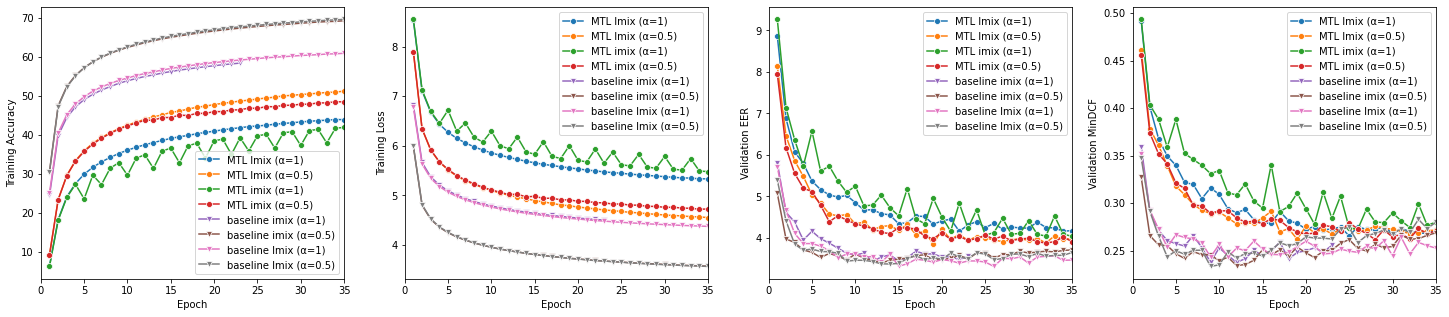

In [8]:
loss_acc_baseline = {}
for file in AHC_folder_info['AHC results (l2Norm)']:
    loss_acc_baseline[file] = {}
    loss_acc_baseline[file]['Training Accuracy'] = []
    loss_acc_baseline[file]['Training Loss'] = []
    loss_acc_baseline[file]['Validation EER'] = []
    loss_acc_baseline[file]['Validation MinDCF'] = []
    with open('folder_MTL/'+file+'/result/scores.txt') as f:
        lines = f.readlines()
        for line in lines:
            line = line.strip()
            if line.find('TEER/TAcc')>=0:
                if line.find('Epoch 1,')>=0:
                    loss_acc_baseline[file]['Training Accuracy'] = []
                    loss_acc_baseline[file]['Training Loss'] = []
                loss_acc_baseline[file]['Training Accuracy'].append(float(line[line.find('TAcc')+5:line.find(', TLOSS')]))
                loss_acc_baseline[file]['Training Loss'].append(float(line[line.find('TLOSS')+6:line.find(', LR')]))
            elif line.find('VEER')>=0:
                if line.find('Epoch 1,')>=0:
                    loss_acc_baseline[file]['Validation EER'] = []
                    loss_acc_baseline[file]['Validation MinDCF'] = []
                loss_acc_baseline[file]['Validation EER'].append(float(line[line.find('VEER')+5:line.find(', MinDCF')]))
                loss_acc_baseline[file]['Validation MinDCF'].append(float(line[line.find('MinDCF')+7:]))
    
print('####AHC MTL model results versus baseline results (l2Norm)####')
loss_acc = {}
for model in AHC_best.keys():
    for file in AHC_folder_info[model]:
        if file in AHC_best[model]:
            loss_acc[file] = {}
            loss_acc[file]['Training Accuracy'] = []
            loss_acc[file]['Training Loss'] = []
            loss_acc[file]['Validation EER'] = []
            loss_acc[file]['Validation MinDCF'] = []
            with open('folder_MTL/'+file+'/result/scores.txt') as f:
                lines = f.readlines()
                for line in lines:
                    line = line.strip()
                    if line.find('TEER/TAcc')>=0:
                        if line.find('Epoch 1,')>=0:
                            loss_acc[file]['Training Accuracy'] = []
                            loss_acc[file]['Training Loss'] = []
                        loss_acc[file]['Training Accuracy'].append(float(line[line.find('TAcc')+5:line.find(', TLOSS')]))
                        loss_acc[file]['Training Loss'].append(float(line[line.find('TLOSS')+6:line.find(', LR')]))
                
                    elif line.find('VEER')>=0:
                        if line.find('Epoch 1,')>=0:
                            loss_acc[file]['Validation EER'] = []
                            loss_acc[file]['Validation MinDCF'] = []
                        loss_acc[file]['Validation EER'].append(float(line[line.find('VEER')+5:line.find(', MinDCF')]))
                        loss_acc[file]['Validation MinDCF'].append(float(line[line.find('MinDCF')+7:]))
    
attr_list = list(loss_acc.keys())
attr_list2 = list(loss_acc_baseline.keys())
    
attr2_list = ['Training Accuracy', 'Training Loss', 'Validation EER', 'Validation MinDCF']
fig, axs = plt.subplots(1, 4, figsize=(25,5))
for j in range(len(attr2_list)):
    attr2 = attr2_list[j]
    for i in range(len(attr_list)):
        attr = attr_list[i]
        data = loss_acc[attr][attr2]
        sns.lineplot(x=np.arange(1, len(data)+1), y=data, ax=axs[j], label='MTL '+rename_legend(attr), marker="o")
    for i in range(len(attr_list2)):
        attr = attr_list2[i]
        data = loss_acc_baseline[attr][attr2]
        sns.lineplot(x=np.arange(1, len(data)+1), y=data, ax=axs[j], label='baseline '+rename_legend(attr), marker="v")
    axs[j].set_xlabel('Epoch')
    axs[j].set_ylabel(attr2)
    axs[j].set_xlim(0,35)
    axs[j].legend()
plt.show()